<a href="https://colab.research.google.com/github/ShahdHesham10/Project-of-emotion-detection-for-smart-government-services-quality/blob/main/MIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import glob

!rm -rf Positive Negative Twitter twitter_dataset.csv arabic_twitter_dataset.csv

!apt-get install unrar > /dev/null

print("unfolding")
rar_files = glob.glob("*.rar")
if rar_files:
    !unrar x -o+ "{rar_files[0]}" > /dev/null
    print(f" unfolded: {rar_files[0]}")
else:

    !unzip -o *.zip > /dev/null 2>&1
    print(" unfolded successfully (ZIP).")

print(" searching for the tweets")
data = []

for root, dirs, files in os.walk("."):
    for label in ['Positive', 'Negative']:
        if label in os.path.basename(root):
            for filename in files:
                try:
                    file_path = os.path.join(root, filename)
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        text = f.read().strip()
                        if text:
                            data.append({'text': text, 'label': label})
                except: continue
        elif label in dirs:
             target_dir = os.path.join(root, label)
             for filename in os.listdir(target_dir):
                try:
                    file_path = os.path.join(target_dir, filename)
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        text = f.read().strip()
                        if text:
                            data.append({'text': text, 'label': label})
                except: continue

if len(data) > 0:
    df = pd.DataFrame(data)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    df.to_csv('arabic_twitter_dataset.csv', index=False)
    print(f"success {len(df)} ")
    print(df.head())
else:
    print("failed")

unfolding
 unfolded: Twitter.rar
 searching for the tweets
success 3976 
                            text     label
0           الله ع الكلام الجميل  Positive
1       لانهم يمكن يكونو قاهرينك  Negative
2                ايارب يتقبل منا  Positive
3           يعني هي ما راح تعتزر  Negative
4  الامل بالله كبيييييير انشالله  Positive


In [10]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

df = pd.read_csv('arabic_twitter_dataset.csv')

def clean_text(text):
    text = str(text)
    text = re.sub(r'[\u064B-\u065F\u0670]', '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("g", "q", text)
    text = re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufdff\ufe70-\ufeff\s]', '', text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)

label_map = {'Positive': 1, 'Negative': 0}
df['label_id'] = df['label'].map(label_map)

df.dropna(subset=['clean_text', 'label_id'], inplace=True)
df = df[df['clean_text'].str.len() > 2]

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_id'], test_size=0.2, random_state=42, stratify=df['label_id']
)

print(f" Data is ready:\n- Training set size: {len(X_train)}\n- Test set size: {len(X_test)}")
print("\nFirst 5 rows after cleaning:")
print(df[['text', 'clean_text', 'label_id']].head())

print("\nSample from training data (X_train):")
print(X_train.head())


 Data is ready:
- Training set size: 3174
- Test set size: 794

First 5 rows after cleaning:
                            text                     clean_text  label_id
0           الله ع الكلام الجميل           الله ع الكلام الجميل         1
1       لانهم يمكن يكونو قاهرينك       لانهم يمكن يكونو قاهرينك         0
2                ايارب يتقبل منا                ايارب يتقبل منا         1
3           يعني هي ما راح تعتزر           يعني هي ما راح تعتزر         0
4  الامل بالله كبيييييير انشالله  الامل بالله كبيييييير انشالله         1

Sample from training data (X_train):
2724    ﻿يا رب بناتنا و شبابنا كلهم يستطيعوا العمل بهذ...
916                ﻿نحن نحبك في الله و ندعو لك بظهر الغيب
2539                                     امتنا ما في زيها
3759                    اكيد لا دي نعمه ربنا يديمها علينا
800     ﻿صباح الفل و الورد يا شيخ سلمان عطر الله صباحك...
Name: clean_text, dtype: object



2. Generating Exploratory Data Analysis (EDA) Report...


/tmp/ipython-input-1755723168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


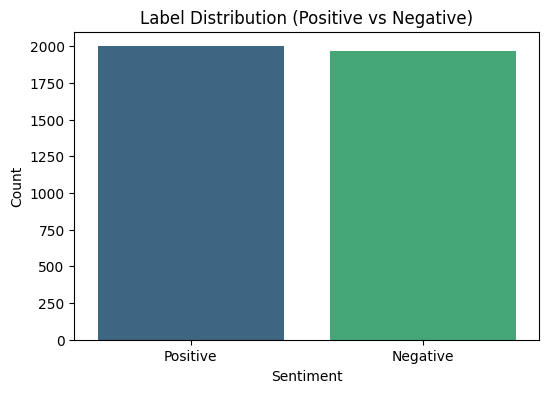

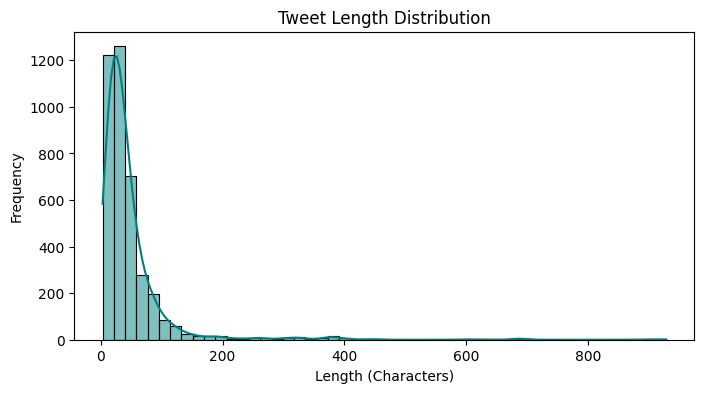

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n2. Generating Exploratory Data Analysis (EDA) Report...")


plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Label Distribution (Positive vs Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


df['text_len'] = df['clean_text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(df['text_len'], bins=50, color='teal', kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()


3. Training Baseline Model (Logistic Regression)...
Baseline Model Results:
   - Accuracy: 92.70%
   - F1 Score: 92.69%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93       394
    Positive       0.92      0.93      0.93       400

    accuracy                           0.93       794
   macro avg       0.93      0.93      0.93       794
weighted avg       0.93      0.93      0.93       794



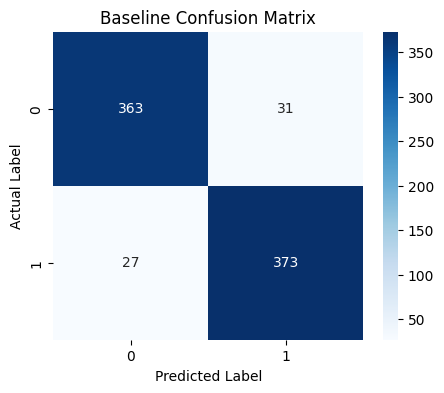

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

print("\n3. Training Baseline Model (Logistic Regression)...")


vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_vec, y_train)


y_pred_lr = model_lr.predict(X_test_vec)


acc_baseline = accuracy_score(y_test, y_pred_lr)
f1_baseline = f1_score(y_test, y_pred_lr, average='weighted')

print("Baseline Model Results:")
print(f"   - Accuracy: {acc_baseline*100:.2f}%")
print(f"   - F1 Score: {f1_baseline*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive']))


plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
!pip install transformers datasets accelerate -q

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

print("\n4. Fine-tuning AraBERT Model (Transfer Learning)...")

train_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
test_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))

model_name = "aubmindlab/bert-base-arabertv02-twitter"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=64)

encoded_train = train_dataset.map(tokenize_function, batched=True)
encoded_test = test_dataset.map(tokenize_function, batched=True)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"accuracy": acc, "f1": f1}

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=2e-5,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    compute_metrics=compute_metrics
)

print("Starting training... (This may take a few minutes)")
trainer.train()

results_bert = trainer.evaluate()
acc_arabert = results_bert['eval_accuracy']
f1_arabert = results_bert['eval_f1']

print("\nAraBERT Final Results:")
print(f"   - Accuracy: {acc_arabert*100:.2f}%")
print(f"   - F1 Score: {f1_arabert*100:.2f}%")


4. Fine-tuning AraBERT Model (Transfer Learning)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/476 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/3174 [00:00<?, ? examples/s]

Map:   0%|          | 0/794 [00:00<?, ? examples/s]

Starting training... (This may take a few minutes)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
